**Prática de Histogramas**

1) 
- Produza a imagem ‘negativa’ do arquivo ‘im_cells.png’
- Com a imagem negativa, produza a imagem original novamente. 
- Mostre lado a lado a imagem original e a negativa. Em qual deles os objetos presentes na imagem são melhor percebidos? Justifique.
- Aplique a imagem uma função logarítmica.


Text(0.5, 1.0, 'Imagem Logaritmica')

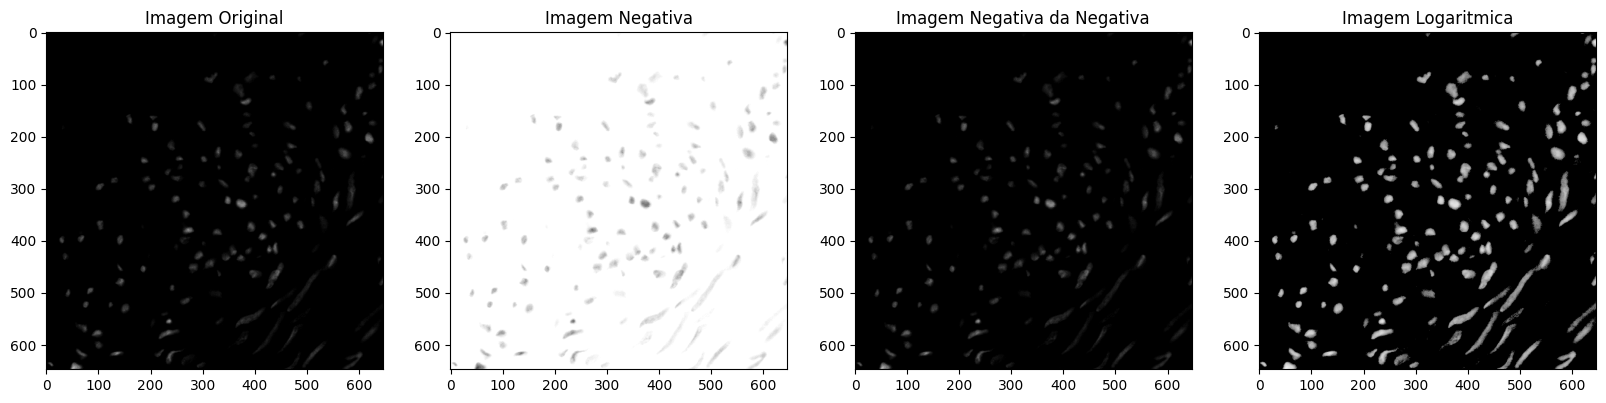

In [61]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from math import log

# Funcao para inverter imagens
def inverterImg(imagem):
    return imagem*(-1) + 255

# Captura imagem original
filename = "im_cells.png"
img = cv.imread(filename, cv.IMREAD_GRAYSCALE)

# Obtem o negativo da imagem original
imgNegativa = inverterImg(img)

# Obtem o negativo do negativo, retornando na original
imgNegativaNegativa = inverterImg(imgNegativa)

# Fazendo log indo de 1 a 255+1, pois ln(0) não existe
ganho = 255/log(256)
imgLog = ganho*np.log(img+1)


# Plotando as imagens
figura = plt.figure(figsize = (20,20))

figura.add_subplot(2,4,1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title(f'Imagem Original')

figura.add_subplot(2,4,2)
plt.imshow(imgNegativa, cmap='gray', vmin=0, vmax=255)
plt.title(f'Imagem Negativa')

figura.add_subplot(2,4,3)
plt.imshow(imgNegativaNegativa, cmap='gray', vmin=0, vmax=255)
plt.title(f'Imagem Negativa da Negativa')

figura.add_subplot(2,4,4)
plt.imshow(imgLog, cmap='gray', vmin=0, vmax=255)
plt.title(f'Imagem Logaritmica')

2)
- Abra a imagem 'pout.tif' e mostre seu histograma.
- Equalize a imagem anterior e mostre novamente seu histograma. Mostra a curva de transformação (consulte https://www.mathworks.com/help/images/histogram-equalization.html)
(procurar função OpenCV)



Text(0.5, 1.0, 'Acumulado Equalizado')

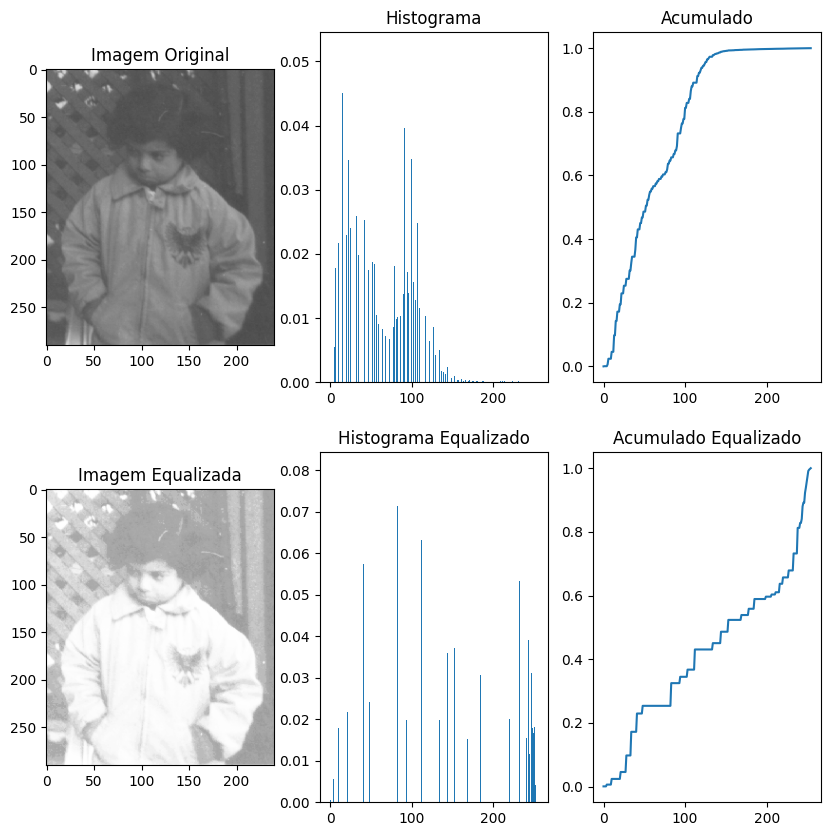

In [64]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Captura imagem original
filename = "pout.tif"
img = cv.imread(filename, cv.IMREAD_GRAYSCALE)

# Calcula histograma
imgHist, _ = np.histogram(img, bins=255)
imgHist = imgHist/(img.shape[0]*img.shape[1])
imgHistSum = np.cumsum(imgHist)

novoHist = imgHistSum * 255

imgEq = np.zeros(img.shape)

for i in range(255):
    imgEq[img == i] = novoHist[i]

# Calcula histograma
imgEqHist, _ = np.histogram(imgEq, bins=255)
imgEqHist = imgEqHist/(imgEq.shape[0]*imgEq.shape[1])
imgEqHistSum = np.cumsum(imgEqHist)

# Plotando as imagens
figura = plt.figure(figsize = (10,10))

figura.add_subplot(2,3,1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title(f'Imagem Original')

figura.add_subplot(2,3,2)
plt.bar(range(255),imgHist)
plt.title(f'Histograma')

figura.add_subplot(2,3,3)
plt.plot(range(255),imgHistSum)
plt.title(f'Acumulado')

figura.add_subplot(2,3,4)
plt.imshow(imgEq, cmap='gray', vmin=0, vmax=255)
plt.title(f'Imagem Equalizada')

figura.add_subplot(2,3,5)
plt.bar(range(255),imgEqHist)
plt.title(f'Histograma Equalizado')

figura.add_subplot(2,3,6)
plt.plot(range(255),imgEqHistSum)
plt.title(f'Acumulado Equalizado')

3) *Implemente* o algoritmo de equalização de histograma e aplique a imagem ‘imcells.png’. Use o mínimos de laços for - tente realizar operações diretas com matrizes e vetores do numpy
- Aplique o mesmo algortimo 2x na mesma imagem e compare os resultados

Text(0.5, 1.0, 'Acumulado Equalizado²')

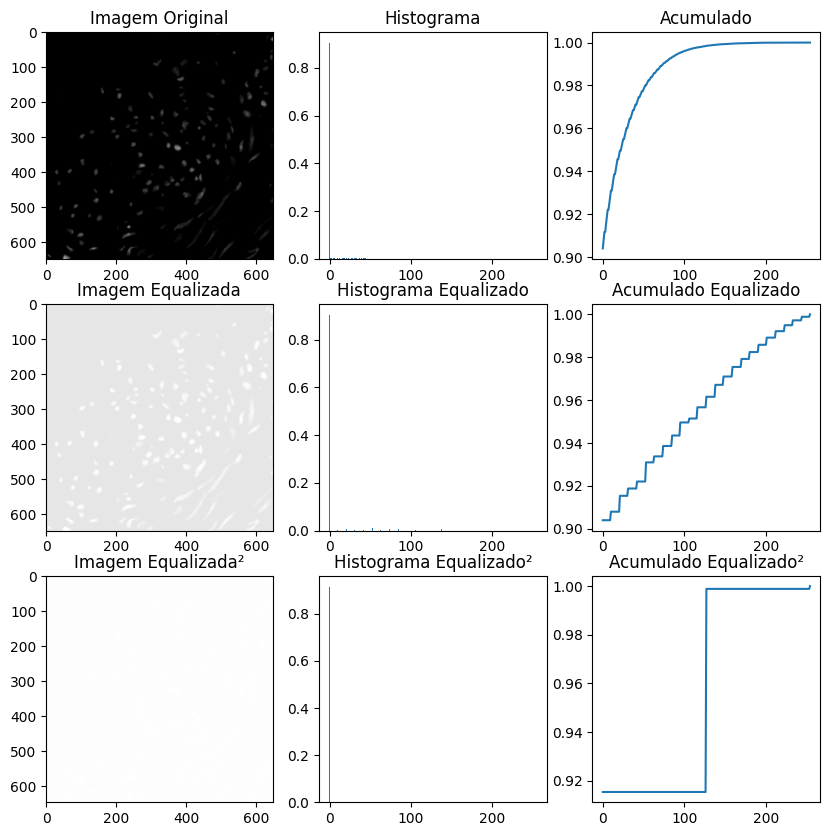

In [65]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Captura imagem original
filename = "im_cells.png"
img = cv.imread(filename, cv.IMREAD_GRAYSCALE)


# Calcula histograma
def img2hist(imagem):
    histograma, _ = np.histogram(imagem, bins=255)
    histograma = histograma/(imagem.shape[0]*imagem.shape[1])
    acumulado = np.cumsum(histograma)

    return histograma, acumulado

def equalization(imagem):

    _ , imagemCumSum = img2hist(imagem)
    novoHistograma = (imagemCumSum * 255).astype(np.uint8)

    equalizada = np.zeros(imagem.shape)

    for i in range(255):
        equalizada[imagem == i] = novoHistograma[i]    

    return equalizada


imgHist , imgHistSum = img2hist(img)

imgEq = equalization(img)
imgEqHist , imgEqHistSum = img2hist(imgEq)

imgEqEq = equalization(imgEq)
imgEqEqHist , imgEqEqHistSum = img2hist(imgEqEq)


# Plotando as imagens
figura = plt.figure(figsize = (10,10))

figura.add_subplot(3,3,1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title(f'Imagem Original')

figura.add_subplot(3,3,2)
plt.bar(range(255),imgHist)
plt.title(f'Histograma')

figura.add_subplot(3,3,3)
plt.plot(range(255),imgHistSum)
plt.title(f'Acumulado')

figura.add_subplot(3,3,4)
plt.imshow(imgEq, cmap='gray', vmin=0, vmax=255)
plt.title(f'Imagem Equalizada')

figura.add_subplot(3,3,5)
plt.bar(range(255),imgEqHist)
plt.title(f'Histograma Equalizado')

figura.add_subplot(3,3,6)
plt.plot(range(255),imgEqHistSum)
plt.title(f'Acumulado Equalizado')

figura.add_subplot(3,3,7)
plt.imshow(imgEqEq, cmap='gray', vmin=0, vmax=255)
plt.title(f'Imagem Equalizada²')

figura.add_subplot(3,3,8)
plt.bar(range(255),imgEqEqHist)
plt.title(f'Histograma Equalizado²')

figura.add_subplot(3,3,9)
plt.plot(range(255),imgEqEqHistSum)
plt.title(f'Acumulado Equalizado²')
